In [1]:
# ONLY RUN THIS IF YOU'RE IN GOOGLE COLAB
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Thesis/Pintu-Air')

# Verify you're in the right place
!pwd
!ls -la

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Thesis/Pintu-Air
total 8001
-rw------- 1 root root 6428389 May 28 22:44 '03 Result Data Cleaning Part 3.csv'
-rw------- 1 root root  317906 May 28 22:44  04a_ARIMA_Katulampa.ipynb
-rw------- 1 root root  250989 May 28 22:44  04c_ARIMA_Manggarai.ipynb
-rw------- 1 root root 1158399 May 29 11:17  04e_ARIMA_Pasar_Ikan.ipynb
drwx------ 2 root root    4096 May 28 22:44  .git
-rw------- 1 root root   12122 May 28 22:44  LibrariesFunctions.py
-rw------- 1 root root    3166 May 28 22:44 'model_comparison_Katulampa (air)_results.csv'
-rw------- 1 root root    2636 May 28 22:44 'model_comparison_Manggarai (air)_results.csv'
-rw------- 1 root root    8442 May 28 22:44 'model_comparison_Pasar Ikan (air)_results.csv'
drwx------ 2 root root    4096 May 28 22:44  __pycache__
-rw------- 1 root root      11 May 28 22:44  README.md


In [2]:
# Import libraries and functions
%run LibrariesFunctions.py
from LibrariesFunctions import *

# Import Data

In [3]:
data_x_train, data_x_test, data_y_train, data_y_test = read_data('Pasar Ikan')

Full Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31224 entries, 2021-10-16 00:00:00 to 2025-05-08 23:00:00
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Raw                31196 non-null  float64
 1   ID_Cleaned            31224 non-null  int64  
 2   Katulampa (air)       31224 non-null  float64
 3   Katulampa (cuaca)     31224 non-null  object 
 4   Depok (air)           31224 non-null  float64
 5   Depok (cuaca)         31224 non-null  object 
 6   Manggarai (air)       31224 non-null  float64
 7   Manggarai (cuaca)     31224 non-null  object 
 8   Karet (air)           31224 non-null  float64
 9   Karet (cuaca)         31224 non-null  object 
 10  Krukut (air)          31224 non-null  float64
 11  Krukut (cuaca)        31224 non-null  object 
 12  Pesanggrahan (air)    31224 non-null  float64
 13  Pesanggrahan (cuaca)  31224 non-null  object 
 14  Angke (ai

In [4]:
data_y_train

,Pasar Ikan (air)
Tanggal,
2021-10-16 00:00:00,155.0
2021-10-16 01:00:00,155.0
2021-10-16 02:00:00,155.0
2021-10-16 03:00:00,140.0
2021-10-16 04:00:00,146.0
...,...
2025-03-04 17:00:00,170.0
2025-03-04 18:00:00,165.0
2025-03-04 19:00:00,180.0


# EDA

In [5]:
period = 24

decomposition = seasonal_decompose(
    data_y_train,
    model='additive',
    period=period,
    extrapolate_trend='freq'
)
plot_decompose(decomposition)

Output hidden; open in https://colab.research.google.com to view.

In [6]:
period = 12

decomposition = seasonal_decompose(
    data_y_train,
    model='additive',
    period=period,
    extrapolate_trend='freq'
)
plot_decompose(decomposition)

Output hidden; open in https://colab.research.google.com to view.

# Uji Stasioneritas

## Uji Stasioneritas terhadap Varians

$$
\begin{aligned}
H_0&: \lambda=1 \text{(Stasioner terhadap varians)}\\H_1&: \lambda\ne1\\
\end{aligned}
$$

In [7]:
lambda_opt = boxcox_transformation(data_y_train)

Lambda optimal: 0.8890
LRT statistic: 9.2481
P-value: 0.002357


In [8]:
print(f"{lambda_opt:.50f}")

0.88902669668587597229247876384761184453964233398438


Karena P-Value LR test lambda(1) = 0.002357 < 0.05, maka tolak H0, maka data tidak stasioner terhadap varians, sehingga perlu dilakukan transformasi sesuai dengan lambda optimal

In [9]:
data_y_train_pow = data_y_train ** lambda_opt
boxcox_transformation(data_y_train_pow)

Lambda optimal: 1.0000
LRT statistic: 0.0000
P-value: 0.999996


np.float64(1.0000001246686447)

## Uji Stasioneritas terhadap Mean

$$
\begin{aligned}
H_0&: \text{Data tidak stasioner terhadap mean}\\
H_1&: \text{Data stasioner terhadap mean}\\
\end{aligned}
$$

In [10]:
result = adfuller(data_y_train_pow)

# Hasil ADF test
print(f"ADF Statistic : {result[0]}")
print(f"p-value       : {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key} : {value}")

ADF Statistic : -10.47227496971786
p-value       : 1.2751971927739152e-18
Critical Values:
   1% : -3.430570851916634
   5% : -2.861637610530469
   10% : -2.5668219551148246


# ACF PACF

Karena p-value 1.275e-18 =  < 0.05, maka tolak H0, sehingga kita memiliki cukup bukti untuk menyimpulkan bahwa data stasioner terhadap mean

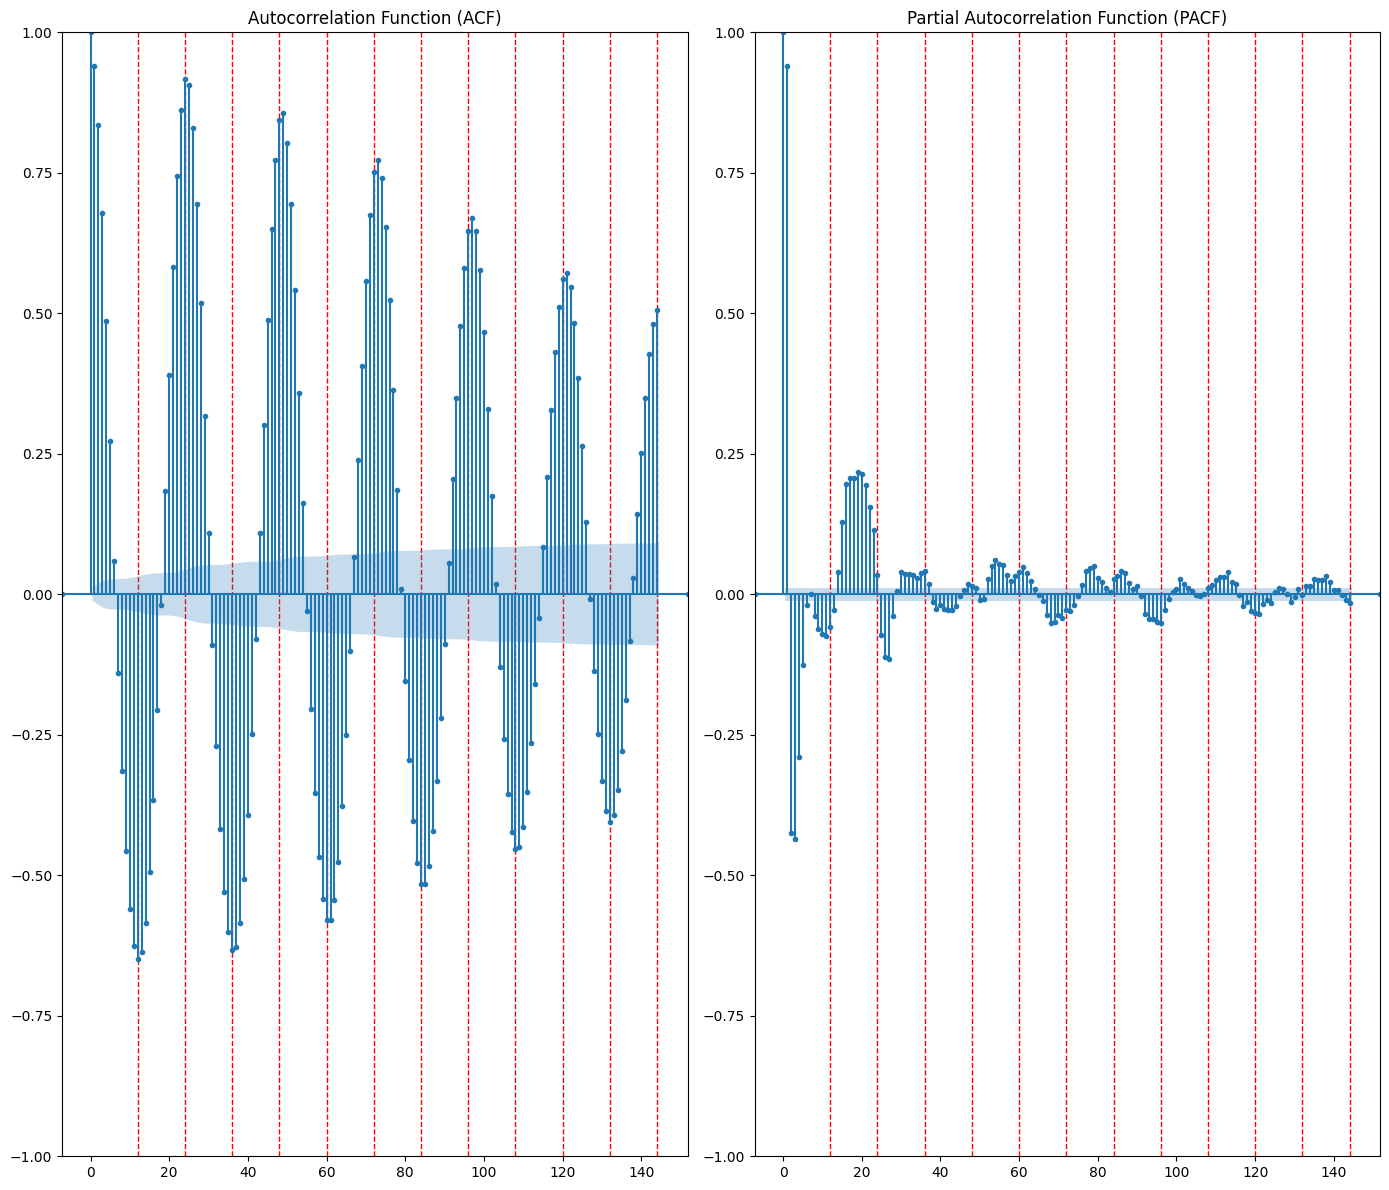

In [11]:
plot_acf_pacf(data_y_train_pow, period, 150)

# Modelling

In [ ]:
# # Define model configurations to test
# ar_configs = [
#     # AR model based on ACF PACF
#     {'name': 'ARIMA(1,0,0)', 'model_type': 'ARIMA', 'order': (1,0,0), 'seasonal_order': None, 'exog': False},

#     # SARIMA models
#     {'name': 'SARIMA(0,0,0)x(0,0,0,12)', 'model_type': 'SARIMA', 'order': (0,0,0), 'seasonal_order': (0,0,0,12), 'exog': False},

#     # ARIMAX models
#     {'name': 'ARIMAX(0,0,0)', 'model_type': 'ARIMAX', 'order': (0,0,0), 'seasonal_order': None, 'exog': True},

#     # SARIMAX models
#     {'name': 'SARIMAX(0,0,0)x(0,0,0,12)', 'model_type': 'SARIMAX', 'order': (0,0,0), 'seasonal_order': (0,0,0,12), 'exog': True},
# ]

In [ ]:
# ARIMA model based on ACF PACF (q: dies down; p: cut off at lag-6)
ar_configs = [
    {'name': 'ARIMA(1,0,0)', 'model_type': 'ARIMA', 'order': (1,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,0)', 'model_type': 'ARIMA', 'order': (2,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(3,0,0)', 'model_type': 'ARIMA', 'order': (3,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(4,0,0)', 'model_type': 'ARIMA', 'order': (4,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(5,0,0)', 'model_type': 'ARIMA', 'order': (5,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(6,0,0)', 'model_type': 'ARIMA', 'order': (6,0,0), 'seasonal_order': None, 'exog': False},
]
ar_comparison = modelling (ar_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
ar_comparison


Testing ARIMA(1,0,0)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -87364.172
Date:                Wed, 28 May 2025   AIC                         174734.344
Time:                        07:07:25   BIC                         174759.237
Sample:                    10-16-2021   HQIC                        174742.336
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4089      0.450    232.055      0.000     103.527     105.291
ar.L1          0.9406      0.002    448.617      0.000       0.93

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(1,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,9.2351,23.4623
1,Pasar Ikan (air),"ARIMA(2,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,8.3537,23.4397
2,Pasar Ikan (air),"ARIMA(3,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,7.5238,23.3897
3,Pasar Ikan (air),"ARIMA(4,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,7.2060,23.3124
4,Pasar Ikan (air),"ARIMA(5,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,7.1495,23.2710
5,Pasar Ikan (air),"ARIMA(6,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,7.1483,23.2621
6,Pasar Ikan (air),"ARIMA(7,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1483,23.2624


In [ ]:
# Since all the model parameters are significant to the model, we try other ar model
ar2_configs = [
    {'name': 'ARIMA(7,0,0)', 'model_type': 'ARIMA', 'order': (7,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(8,0,0)', 'model_type': 'ARIMA', 'order': (8,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(9,0,0)', 'model_type': 'ARIMA', 'order': (9,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(10,0,0)', 'model_type': 'ARIMA', 'order': (10,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(11,0,0)', 'model_type': 'ARIMA', 'order': (11,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(12,0,0)', 'model_type': 'ARIMA', 'order': (12,0,0), 'seasonal_order': None, 'exog': False},
]
ar2_comparison = modelling (ar2_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)


Testing ARIMA(7,0,0)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -79770.652
Date:                Wed, 28 May 2025   AIC                         159559.304
Time:                        07:13:00   BIC                         159633.982
Sample:                    10-16-2021   HQIC                        159583.278
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4089      0.116    900.328      0.000     104.182     104.636
ar.L1          0.9915      0.003    342.174      0.000       0.98

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(7,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1483,23.2624
1,Pasar Ikan (air),"ARIMA(8,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1426,23.2422
2,Pasar Ikan (air),"ARIMA(9,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,7.1281,23.2085
3,Pasar Ikan (air),"ARIMA(10,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1098,23.1740
4,Pasar Ikan (air),"ARIMA(11,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,7.0894,23.1533
5,Pasar Ikan (air),"ARIMA(12,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,7.0774,23.1538


In [ ]:
# Try MA models
ma_configs = [
    {'name': 'ARIMA(0,0,1)', 'model_type': 'ARIMA', 'order': (0,0,1), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,2)', 'model_type': 'ARIMA', 'order': (0,0,2), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,3)', 'model_type': 'ARIMA', 'order': (0,0,3), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,4)', 'model_type': 'ARIMA', 'order': (0,0,4), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,5)', 'model_type': 'ARIMA', 'order': (0,0,5), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,6)', 'model_type': 'ARIMA', 'order': (0,0,6), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,7)', 'model_type': 'ARIMA', 'order': (0,0,7), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,8)', 'model_type': 'ARIMA', 'order': (0,0,8), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,9)', 'model_type': 'ARIMA', 'order': (0,0,9), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,10)', 'model_type': 'ARIMA', 'order': (0,0,10), 'seasonal_order': None, 'exog': False},
]
ma_comparison = modelling (ma_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
ma_comparison


Testing ARIMA(0,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                 ARIMA(0, 0, 1)   Log Likelihood             -104527.900
Date:                Wed, 28 May 2025   AIC                         209061.800
Time:                        08:26:26   BIC                         209086.693
Sample:                    10-16-2021   HQIC                        209069.791
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4090      0.087   1202.501      0.000     104.239     104.579
ma.L1          0.8213      0.003    272.282      0.000       0.81

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(0,0,1)",Ya,0.000000,Tidak,0.001000,Tidak,16.4721,23.4850
1,Pasar Ikan (air),"ARIMA(0,0,2)",Ya,0.000000,Tidak,0.001000,Tidak,12.3285,23.4819
2,Pasar Ikan (air),"ARIMA(0,0,3)",Ya,0.000000,Tidak,0.001000,Tidak,10.3810,23.4750
3,Pasar Ikan (air),"ARIMA(0,0,4)",Ya,0.000000,Tidak,0.001000,Tidak,9.2558,23.4748
4,Pasar Ikan (air),"ARIMA(0,0,5)",Ya,0.000000,Tidak,0.001000,Tidak,8.5162,23.4669
5,Pasar Ikan (air),"ARIMA(0,0,6)",Ya,0.000000,Tidak,0.001000,Tidak,8.1222,23.4567
6,Pasar Ikan (air),"ARIMA(0,0,7)",Ya,0.000000,Tidak,0.001000,Tidak,7.8835,23.4532
7,Pasar Ikan (air),"ARIMA(0,0,8)",Ya,0.000000,Tidak,0.001000,Tidak,7.6218,23.4385
8,Pasar Ikan (air),"ARIMA(0,0,9)",Ya,0.000000,Tidak,0.001000,Tidak,7.4823,23.4276
9,Pasar Ikan (air),"ARIMA(0,0,10)",Ya,0.000000,Tidak,0.001000,Tidak,7.4217,23.4187


In [ ]:
# Try MA models
ma2_configs = [
    {'name': 'ARIMA(0,0,11)', 'model_type': 'ARIMA', 'order': (0,0,11), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,12)', 'model_type': 'ARIMA', 'order': (0,0,12), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,13)', 'model_type': 'ARIMA', 'order': (0,0,13), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,14)', 'model_type': 'ARIMA', 'order': (0,0,14), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(0,0,15)', 'model_type': 'ARIMA', 'order': (0,0,15), 'seasonal_order': None, 'exog': False},
]
ma2_comparison = modelling (ma2_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
ma2_comparison


Testing ARIMA(0,0,11)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                ARIMA(0, 0, 11)   Log Likelihood              -80734.344
Date:                Wed, 28 May 2025   AIC                         161494.689
Time:                        08:38:07   BIC                         161602.558
Sample:                    10-16-2021   HQIC                        161529.318
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4089      0.249    418.677      0.000     103.920     104.898
ma.L1          1.0440      0.003    365.351      0.000       1.0

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(0,0,11)",Ya,0.000000,Tidak,0.001000,Tidak,7.3853,23.4097
1,Pasar Ikan (air),"ARIMA(0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.3614,23.4052
2,Pasar Ikan (air),"ARIMA(0,0,13)",Ya,0.000000,Tidak,0.001000,Tidak,7.3528,23.4025
3,Pasar Ikan (air),"ARIMA(0,0,14)",Tidak,0.000000,Tidak,0.001000,Tidak,7.3526,23.4018
4,Pasar Ikan (air),"ARIMA(0,0,15)",Tidak,0.000000,Tidak,0.001000,Tidak,7.3401,23.4110


In [ ]:
# Try ARMA models
arma_configs = [
    {'name': 'ARIMA(1,0,1)', 'model_type': 'ARIMA', 'order': (1,0,1), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(1,0,2)', 'model_type': 'ARIMA', 'order': (1,0,2), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(1,0,3)', 'model_type': 'ARIMA', 'order': (1,0,3), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(1,0,4)', 'model_type': 'ARIMA', 'order': (1,0,4), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(1,0,5)', 'model_type': 'ARIMA', 'order': (1,0,5), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(1,0,6)', 'model_type': 'ARIMA', 'order': (1,0,6), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(1,0,7)', 'model_type': 'ARIMA', 'order': (1,0,7), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(1,0,8)', 'model_type': 'ARIMA', 'order': (1,0,8), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(1,0,9)', 'model_type': 'ARIMA', 'order': (1,0,9), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(1,0,10)', 'model_type': 'ARIMA', 'order': (1,0,10), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(1,0,11)', 'model_type': 'ARIMA', 'order': (1,0,11), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(1,0,12)', 'model_type': 'ARIMA', 'order': (1,0,12), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(1,0,13)', 'model_type': 'ARIMA', 'order': (1,0,13), 'seasonal_order': None, 'exog': False},
]
arma_comparison = modelling (arma_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
arma_comparison


Testing ARIMA(1,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -85805.475
Date:                Wed, 28 May 2025   AIC                         171618.949
Time:                        09:02:41   BIC                         171652.140
Sample:                    10-16-2021   HQIC                        171629.605
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4089      0.383    272.488      0.000     103.658     105.160
ar.L1          0.9162      0.003    359.148      0.000       0.91

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(1,0,1)",Ya,0.000000,Tidak,0.001000,Tidak,8.7596,23.4550
1,Pasar Ikan (air),"ARIMA(1,0,2)",Ya,0.000000,Tidak,0.001000,Tidak,8.2626,23.4511
2,Pasar Ikan (air),"ARIMA(1,0,3)",Ya,0.000000,Tidak,0.001000,Tidak,7.9071,23.4406
3,Pasar Ikan (air),"ARIMA(1,0,4)",Ya,0.000000,Tidak,0.001000,Tidak,7.7088,23.4355
4,Pasar Ikan (air),"ARIMA(1,0,5)",Ya,0.000000,Tidak,0.001000,Tidak,7.6145,23.4277
5,Pasar Ikan (air),"ARIMA(1,0,6)",Ya,0.000000,Tidak,0.001000,Tidak,7.5223,23.4189
6,Pasar Ikan (air),"ARIMA(1,0,7)",Ya,0.000000,Tidak,0.001000,Tidak,7.4476,23.4136
7,Pasar Ikan (air),"ARIMA(1,0,8)",Ya,0.000000,Tidak,0.001000,Tidak,7.4073,23.4104
8,Pasar Ikan (air),"ARIMA(1,0,9)",Ya,0.000000,Tidak,0.001000,Tidak,7.3871,23.4066
9,Pasar Ikan (air),"ARIMA(1,0,10)",Ya,0.000000,Tidak,0.001000,Tidak,7.4597,23.4277


In [ ]:
# Try ARMA models
arma2_configs = [
    {'name': 'ARIMA(2,0,1)', 'model_type': 'ARIMA', 'order': (2,0,1), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,2)', 'model_type': 'ARIMA', 'order': (2,0,2), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,3)', 'model_type': 'ARIMA', 'order': (2,0,3), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,4)', 'model_type': 'ARIMA', 'order': (2,0,4), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,5)', 'model_type': 'ARIMA', 'order': (2,0,5), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,6)', 'model_type': 'ARIMA', 'order': (2,0,6), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,7)', 'model_type': 'ARIMA', 'order': (2,0,7), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,8)', 'model_type': 'ARIMA', 'order': (2,0,8), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,9)', 'model_type': 'ARIMA', 'order': (2,0,9), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,10)', 'model_type': 'ARIMA', 'order': (2,0,10), 'seasonal_order': None, 'exog': False},
]
arma2_comparison = modelling (arma2_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
arma2_comparison


Testing ARIMA(2,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                 ARIMA(2, 0, 1)   Log Likelihood              -80477.711
Date:                Wed, 28 May 2025   AIC                         160965.422
Time:                        09:22:31   BIC                         161006.910
Sample:                    10-16-2021   HQIC                        160978.741
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4105      0.094   1114.025      0.000     104.227     104.594
ar.L1          1.8665      0.003    743.410      0.000       1.86

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(2,0,1)",Ya,0.000000,Tidak,0.001000,Tidak,7.3176,23.1850
1,Pasar Ikan (air),"ARIMA(2,0,2)",Ya,0.000000,Tidak,0.001000,Tidak,7.1606,23.2535
2,Pasar Ikan (air),"ARIMA(2,0,3)",Ya,0.000000,Tidak,0.001000,Tidak,7.1508,23.2094
3,Pasar Ikan (air),"ARIMA(2,0,4)",Ya,0.000000,Tidak,0.001000,Tidak,7.1293,23.2075
4,Pasar Ikan (air),"ARIMA(2,0,5)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1249,23.2209
5,Pasar Ikan (air),"ARIMA(2,0,6)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1247,23.2153
6,Pasar Ikan (air),"ARIMA(2,0,7)",Tidak,0.000000,Tidak,0.001000,Tidak,6.7857,20.9021
7,Pasar Ikan (air),"ARIMA(2,0,8)",Tidak,0.000000,Tidak,0.001000,Tidak,6.7388,20.4991
8,Pasar Ikan (air),"ARIMA(2,0,9)",Ya,0.000000,Tidak,0.001000,Tidak,7.2822,23.4254
9,Pasar Ikan (air),"ARIMA(2,0,10)",Ya,0.000000,Tidak,0.001000,Tidak,7.2776,23.4319


In [ ]:
# Try ARMA models
arma3_configs = [
    {'name': 'ARIMA(2,0,11)', 'model_type': 'ARIMA', 'order': (2,0,11), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,12)', 'model_type': 'ARIMA', 'order': (2,0,12), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,13)', 'model_type': 'ARIMA', 'order': (2,0,13), 'seasonal_order': None, 'exog': False}
]
arma3_comparison = modelling (arma3_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
arma3_comparison


Testing ARIMA(2,0,11)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                ARIMA(2, 0, 11)   Log Likelihood              -80237.259
Date:                Wed, 28 May 2025   AIC                         160504.518
Time:                        09:53:59   BIC                         160628.982
Sample:                    10-16-2021   HQIC                        160544.475
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4100      0.223    467.696      0.000     103.972     104.848
ar.L1          1.5953      0.006    246.097      0.000       1.5

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(2,0,11)",Ya,0.000000,Tidak,0.001000,Tidak,7.2613,23.4452
1,Pasar Ikan (air),"ARIMA(2,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,6.8694,23.0668
2,Pasar Ikan (air),"ARIMA(2,0,13)",Tidak,0.000000,Tidak,0.001000,Tidak,6.6820,22.5556


In [ ]:
# Try ARMA models
arma4_configs = [
    {'name': 'ARIMA(3,0,1)', 'model_type': 'ARIMA', 'order': (3,0,1), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(3,0,2)', 'model_type': 'ARIMA', 'order': (3,0,2), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(3,0,3)', 'model_type': 'ARIMA', 'order': (3,0,3), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(3,0,4)', 'model_type': 'ARIMA', 'order': (3,0,4), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(3,0,5)', 'model_type': 'ARIMA', 'order': (3,0,5), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(3,0,6)', 'model_type': 'ARIMA', 'order': (3,0,6), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(3,0,7)', 'model_type': 'ARIMA', 'order': (3,0,7), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(3,0,8)', 'model_type': 'ARIMA', 'order': (3,0,8), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(3,0,9)', 'model_type': 'ARIMA', 'order': (3,0,9), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(3,0,10)', 'model_type': 'ARIMA', 'order': (3,0,10), 'seasonal_order': None, 'exog': False}
]
arma4_comparison = modelling (arma4_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
arma4_comparison


Testing ARIMA(3,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                 ARIMA(3, 0, 1)   Log Likelihood              -79830.721
Date:                Wed, 28 May 2025   AIC                         159673.443
Time:                        10:03:07   BIC                         159723.229
Sample:                    10-16-2021   HQIC                        159689.426
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4098      0.101   1030.235      0.000     104.211     104.608
ar.L1          1.5756      0.007    221.755      0.000       1.56

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(3,0,1)",Ya,0.000000,Tidak,0.001000,Tidak,7.1617,23.1906
1,Pasar Ikan (air),"ARIMA(3,0,2)",Ya,0.000000,Tidak,0.001000,Tidak,7.1551,23.2266
2,Pasar Ikan (air),"ARIMA(3,0,3)",Ya,0.000000,Tidak,0.001000,Tidak,7.1377,23.2176
3,Pasar Ikan (air),"ARIMA(3,0,4)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1268,23.2187
4,Pasar Ikan (air),"ARIMA(3,0,5)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1248,23.2199
5,Pasar Ikan (air),"ARIMA(3,0,6)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1248,23.2208
6,Pasar Ikan (air),"ARIMA(3,0,7)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1247,23.2157
7,Pasar Ikan (air),"ARIMA(3,0,8)",Tidak,0.000000,Tidak,0.001000,Tidak,6.7292,21.4125
8,Pasar Ikan (air),"ARIMA(3,0,9)",Tidak,0.000000,Tidak,0.001000,Tidak,7.2854,23.4214
9,Pasar Ikan (air),"ARIMA(3,0,10)",Tidak,0.000000,Tidak,0.001000,Tidak,7.2817,23.4258


In [ ]:
# Try ARMA models
arma5_configs = [
    {'name': 'ARIMA(4,0,1)', 'model_type': 'ARIMA', 'order': (4,0,1), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(4,0,2)', 'model_type': 'ARIMA', 'order': (4,0,2), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(4,0,3)', 'model_type': 'ARIMA', 'order': (4,0,3), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(4,0,4)', 'model_type': 'ARIMA', 'order': (4,0,4), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(4,0,5)', 'model_type': 'ARIMA', 'order': (4,0,5), 'seasonal_order': None, 'exog': False},
]
arma5_comparison = modelling (arma5_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
arma5_comparison


Testing ARIMA(4,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                 ARIMA(4, 0, 1)   Log Likelihood              -79772.331
Date:                Wed, 28 May 2025   AIC                         159558.662
Time:                        10:20:42   BIC                         159616.745
Sample:                    10-16-2021   HQIC                        159577.309
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4097      0.110    948.981      0.000     104.194     104.625
ar.L1          1.3987      0.015     96.364      0.000       1.37

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(4,0,1)",Ya,0.000000,Tidak,0.001000,Tidak,7.1485,23.2343
1,Pasar Ikan (air),"ARIMA(4,0,2)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1485,23.2330
2,Pasar Ikan (air),"ARIMA(4,0,3)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1533,23.2209
3,Pasar Ikan (air),"ARIMA(4,0,4)",Ya,0.000000,Tidak,0.001000,Tidak,6.5525,25.6647
4,Pasar Ikan (air),"ARIMA(4,0,5)",Ya,0.000000,Tidak,0.001000,Tidak,6.5097,22.3463


In [ ]:
# Try ARMA models
arma6_configs = [
    {'name': 'ARIMA(4,0,6)', 'model_type': 'ARIMA', 'order': (4,0,6), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(4,0,7)', 'model_type': 'ARIMA', 'order': (4,0,7), 'seasonal_order': None, 'exog': False}
]
arma6_comparison = modelling (arma6_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
arma6_comparison


Testing ARIMA(4,0,6)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                 ARIMA(4, 0, 6)   Log Likelihood              -79686.784
Date:                Wed, 28 May 2025   AIC                         159397.567
Time:                        10:35:03   BIC                         159497.139
Sample:                    10-16-2021   HQIC                        159429.533
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.3708      0.101   1030.284      0.000     104.172     104.569
ar.L1          0.3315      0.092      3.596      0.000       0.15

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(4,0,6)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1273,23.2143
1,Pasar Ikan (air),"ARIMA(4,0,7)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1244,23.2206


In [ ]:
# Try ARMA models
arma7_configs = [
    {'name': 'ARIMA(5,0,1)', 'model_type': 'ARIMA', 'order': (5,0,1), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(5,0,2)', 'model_type': 'ARIMA', 'order': (5,0,2), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(5,0,3)', 'model_type': 'ARIMA', 'order': (5,0,3), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(5,0,4)', 'model_type': 'ARIMA', 'order': (5,0,4), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(5,0,5)', 'model_type': 'ARIMA', 'order': (5,0,5), 'seasonal_order': None, 'exog': False},
]
arma7_comparison = modelling (arma7_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
arma7_comparison


Testing ARIMA(5,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                 ARIMA(5, 0, 1)   Log Likelihood              -79770.108
Date:                Wed, 28 May 2025   AIC                         159556.216
Time:                        10:39:48   BIC                         159622.597
Sample:                    10-16-2021   HQIC                        159577.526
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4118      0.115    908.528      0.000     104.187     104.637
ar.L1          1.1691      0.043     26.886      0.000       1.08

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(5,0,1)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1482,23.2580
1,Pasar Ikan (air),"ARIMA(5,0,2)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1477,23.2486
2,Pasar Ikan (air),"ARIMA(5,0,3)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1475,23.2438
3,Pasar Ikan (air),"ARIMA(5,0,4)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1221,23.2175
4,Pasar Ikan (air),"ARIMA(5,0,5)",Ya,0.000000,Tidak,0.001000,Tidak,6.6987,22.5278


In [ ]:
# Try ARMA models
arma8_configs = [
    {'name': 'ARIMA(5,0,1)', 'model_type': 'ARIMA', 'order': (5,0,1), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(5,0,2)', 'model_type': 'ARIMA', 'order': (5,0,2), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(5,0,3)', 'model_type': 'ARIMA', 'order': (5,0,3), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(5,0,4)', 'model_type': 'ARIMA', 'order': (5,0,4), 'seasonal_order': None, 'exog': False},
]
arma8_comparison = modelling (arma8_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
arma8_comparison


Testing ARIMA(5,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                 ARIMA(5, 0, 1)   Log Likelihood              -79770.108
Date:                Wed, 28 May 2025   AIC                         159556.216
Time:                        10:53:06   BIC                         159622.597
Sample:                    10-16-2021   HQIC                        159577.526
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4118      0.115    908.528      0.000     104.187     104.637
ar.L1          1.1691      0.043     26.886      0.000       1.08

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(5,0,1)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1482,23.2580
1,Pasar Ikan (air),"ARIMA(5,0,2)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1477,23.2486
2,Pasar Ikan (air),"ARIMA(5,0,3)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1475,23.2438
3,Pasar Ikan (air),"ARIMA(5,0,4)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1221,23.2175


In [ ]:
# Try ARMA models
arma9_configs = [
    {'name': 'ARIMA(6,0,1)', 'model_type': 'ARIMA', 'order': (6,0,1), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(6,0,2)', 'model_type': 'ARIMA', 'order': (6,0,2), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(6,0,3)', 'model_type': 'ARIMA', 'order': (6,0,3), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(6,0,4)', 'model_type': 'ARIMA', 'order': (6,0,4), 'seasonal_order': None, 'exog': False},
]
arma9_comparison = modelling (arma9_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
arma9_comparison


Testing ARIMA(6,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                 ARIMA(6, 0, 1)   Log Likelihood              -79770.065
Date:                Wed, 28 May 2025   AIC                         159558.131
Time:                        10:58:57   BIC                         159632.809
Sample:                    10-16-2021   HQIC                        159582.105
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4090      0.116    898.272      0.000     104.181     104.637
ar.L1          0.7628      0.287      2.654      0.008       0.19

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(6,0,1)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1482,23.2634
1,Pasar Ikan (air),"ARIMA(6,0,2)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1481,23.2636
2,Pasar Ikan (air),"ARIMA(6,0,3)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1471,23.2478
3,Pasar Ikan (air),"ARIMA(6,0,4)",Tidak,0.000000,Tidak,0.001000,Tidak,6.6868,22.8554


In [ ]:
# Try ARMA models
arma10_configs = [
    {'name': 'ARIMA(7,0,1)', 'model_type': 'ARIMA', 'order': (7,0,1), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(7,0,2)', 'model_type': 'ARIMA', 'order': (7,0,2), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(8,0,1)', 'model_type': 'ARIMA', 'order': (8,0,1), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(8,0,2)', 'model_type': 'ARIMA', 'order': (8,0,2), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(9,0,1)', 'model_type': 'ARIMA', 'order': (9,0,1), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(9,0,2)', 'model_type': 'ARIMA', 'order': (9,0,2), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(9,0,3)', 'model_type': 'ARIMA', 'order': (9,0,3), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(9,0,4)', 'model_type': 'ARIMA', 'order': (9,0,4), 'seasonal_order': None, 'exog': False},
]
arma10_comparison = modelling (arma10_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
arma10_comparison


Testing ARIMA(7,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                 ARIMA(7, 0, 1)   Log Likelihood              -79769.982
Date:                Wed, 28 May 2025   AIC                         159559.964
Time:                        11:10:37   BIC                         159642.941
Sample:                    10-16-2021   HQIC                        159586.603
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4090      0.117    895.749      0.000     104.181     104.637
ar.L1          0.7630      0.849      0.899      0.369      -0.90

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(7,0,1)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1482,23.2646
1,Pasar Ikan (air),"ARIMA(7,0,2)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1480,23.2671
2,Pasar Ikan (air),"ARIMA(8,0,1)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1169,23.1821
3,Pasar Ikan (air),"ARIMA(8,0,2)",Error,Error,Error,Error,Error,Error,Error
4,Pasar Ikan (air),"ARIMA(9,0,1)",Ya,0.000000,Tidak,0.001000,Tidak,7.1027,23.1661
5,Pasar Ikan (air),"ARIMA(9,0,2)",Tidak,0.000000,Tidak,0.001000,Tidak,6.6358,22.4653
6,Pasar Ikan (air),"ARIMA(9,0,3)",Ya,0.000000,Tidak,0.001000,Tidak,6.6139,29.8338
7,Pasar Ikan (air),"ARIMA(9,0,4)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1436,23.2644


In [ ]:
# Add x to AR model that have all parameters significant
arx_configs = [
    {'name': 'ARIMAX(1,0,0)', 'model_type': 'ARIMA', 'order': (1,0,0), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(2,0,0)', 'model_type': 'ARIMA', 'order': (2,0,0), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(3,0,0)', 'model_type': 'ARIMA', 'order': (3,0,0), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(4,0,0)', 'model_type': 'ARIMA', 'order': (4,0,0), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(5,0,0)', 'model_type': 'ARIMA', 'order': (5,0,0), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(6,0,0)', 'model_type': 'ARIMA', 'order': (6,0,0), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(9,0,0)', 'model_type': 'ARIMA', 'order': (9,0,0), 'seasonal_order': None, 'exog': True},
]
arx_comparison = modelling (arx_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
arx_comparison


Testing ARIMA(1,0,0)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -87804.748
Date:                Wed, 28 May 2025   AIC                         175621.495
Time:                        07:21:59   BIC                         175671.281
Sample:                    10-16-2021   HQIC                        175637.478
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Gerimis          -0.2230      0.132     -1.683      0.092      -0.483       0.037
Hujan             0.0312      0.198      0.157      0.87

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(1,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,9.4132,107.9941
1,Pasar Ikan (air),"ARIMA(2,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,8.6949,113.1107
2,Pasar Ikan (air),"ARIMA(3,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,8.1874,Error
3,Pasar Ikan (air),"ARIMA(4,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,17.4488,159.2198
4,Pasar Ikan (air),"ARIMA(5,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,23.6629,104.6654
5,Pasar Ikan (air),"ARIMA(6,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,17.8586,154.1775
6,Pasar Ikan (air),"ARIMA(9,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,25.9109,168.4610


In [ ]:
compare = pd.concat([ar_comparison,
                     ar2_comparison,
                     ma_comparison,
                     ma2_comparison,
                     arma_comparison,
                     arma2_comparison,
                     arma3_comparison,
                     arma4_comparison,
                     arma5_comparison,
                     arma6_comparison,
                     arma7_comparison,
                     arma8_comparison,
                     arma9_comparison,
                     arma10_comparison,
                     arx_comparison
                     ])
compare
compare.to_csv(f'model_comparison_{data_y_train.name}_results.csv')

In [ ]:
compare = pd.read_csv(f'model_comparison_{data_y_train.name}_results.csv', index_col=0)
compare

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(1,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,9.2351,23.4623
1,Pasar Ikan (air),"ARIMA(2,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,8.3537,23.4397
2,Pasar Ikan (air),"ARIMA(3,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,7.5238,23.3897
3,Pasar Ikan (air),"ARIMA(4,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,7.2060,23.3124
4,Pasar Ikan (air),"ARIMA(5,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,7.1495,23.2710
...,...,...,...,...,...,...,...,...,...
2,Pasar Ikan (air),"ARIMAX(3,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,8.1874,Error
3,Pasar Ikan (air),"ARIMAX(4,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,17.4488,159.2198
4,Pasar Ikan (air),"ARIMAX(5,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,23.6629,104.6654
5,Pasar Ikan (air),"ARIMAX(6,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,17.8586,154.1775


In [ ]:
# Add x to all MA and models that have all parameters significant
max_configs = [
    {'name': 'ARIMAX(0,0,1)', 'model_type': 'ARIMA', 'order': (0,0,1), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(0,0,2)', 'model_type': 'ARIMA', 'order': (0,0,2), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(0,0,3)', 'model_type': 'ARIMA', 'order': (0,0,3), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(0,0,4)', 'model_type': 'ARIMA', 'order': (0,0,4), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(0,0,5)', 'model_type': 'ARIMA', 'order': (0,0,5), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(0,0,6)', 'model_type': 'ARIMA', 'order': (0,0,6), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(0,0,7)', 'model_type': 'ARIMA', 'order': (0,0,7), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(0,0,8)', 'model_type': 'ARIMA', 'order': (0,0,8), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(0,0,9)', 'model_type': 'ARIMA', 'order': (0,0,9), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(0,0,10)', 'model_type': 'ARIMA', 'order': (0,0,10), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(0,0,11)', 'model_type': 'ARIMA', 'order': (0,0,11), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(0,0,12)', 'model_type': 'ARIMA', 'order': (0,0,12), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(0,0,13)', 'model_type': 'ARIMA', 'order': (0,0,13), 'seasonal_order': None, 'exog': True}
]
max_comparison = modelling (max_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
max_comparison


Testing ARIMAX(0,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:               SARIMAX(0, 0, 1)   Log Likelihood             -159741.729
Date:                Wed, 28 May 2025   AIC                         319495.459
Time:                        22:58:43   BIC                         319545.245
Sample:                    10-16-2021   HQIC                        319511.442
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Gerimis          31.2961      1.481     21.139      0.000      28.394      34.198
Hujan            32.0689      1.977     16.220      0.0

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMAX(0,0,1)",Ya,0.000000,Tidak,0.001000,Tidak,nan,176.3607
1,Pasar Ikan (air),"ARIMAX(0,0,2)",Ya,0.000000,Tidak,0.001000,Tidak,nan,179.6389
2,Pasar Ikan (air),"ARIMAX(0,0,3)",Ya,0.000000,Tidak,0.001000,Tidak,nan,177.0451
3,Pasar Ikan (air),"ARIMAX(0,0,4)",Ya,0.000000,Tidak,0.001000,Tidak,nan,176.3577
4,Pasar Ikan (air),"ARIMAX(0,0,5)",Ya,0.000000,Tidak,0.001000,Tidak,nan,177.1587
5,Pasar Ikan (air),"ARIMAX(0,0,6)",Ya,0.000000,Tidak,0.001000,Tidak,nan,177.4562
6,Pasar Ikan (air),"ARIMAX(0,0,7)",Ya,0.000000,Tidak,0.001000,Tidak,nan,178.3676
7,Pasar Ikan (air),"ARIMAX(0,0,8)",Ya,0.000000,Tidak,0.001000,Tidak,nan,178.1756
8,Pasar Ikan (air),"ARIMAX(0,0,9)",Ya,0.000000,Tidak,0.001000,Tidak,nan,177.0176
9,Pasar Ikan (air),"ARIMAX(0,0,10)",Ya,0.000000,Tidak,0.001000,Tidak,nan,178.7986


In [ ]:
# Add x to all ARMA and models that have all parameters significant
armax_configs = [
    {'name': 'ARIMAX(1,0,1)', 'model_type': 'ARIMA', 'order': (1,0,1), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(1,0,2)', 'model_type': 'ARIMA', 'order': (1,0,2), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(1,0,3)', 'model_type': 'ARIMA', 'order': (1,0,3), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(1,0,4)', 'model_type': 'ARIMA', 'order': (1,0,4), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(1,0,5)', 'model_type': 'ARIMA', 'order': (1,0,5), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(1,0,6)', 'model_type': 'ARIMA', 'order': (1,0,6), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(1,0,7)', 'model_type': 'ARIMA', 'order': (1,0,7), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(1,0,8)', 'model_type': 'ARIMA', 'order': (1,0,8), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(1,0,9)', 'model_type': 'ARIMA', 'order': (1,0,9), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(1,0,10)', 'model_type': 'ARIMA', 'order': (1,0,10), 'seasonal_order': None, 'exog': True},
]
armax_comparison = modelling (armax_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
armax_comparison


Testing ARIMAX(1,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -86430.199
Date:                Wed, 28 May 2025   AIC                         172874.397
Time:                        23:29:58   BIC                         172932.481
Sample:                    10-16-2021   HQIC                        172893.044
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Gerimis          -0.1468      0.110     -1.330      0.183      -0.363       0.069
Hujan             0.0754      0.166      0.454      0.6

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMAX(1,0,1)",Tidak,0.000000,Tidak,0.001000,Tidak,8.9877,25.6523
1,Pasar Ikan (air),"ARIMAX(1,0,2)",Ya,0.000000,Tidak,0.001000,Tidak,8.8200,Error
2,Pasar Ikan (air),"ARIMAX(1,0,3)",Tidak,0.000000,Tidak,0.001000,Tidak,19.4088,113.7878
3,Pasar Ikan (air),"ARIMAX(1,0,4)",Ya,0.000000,Tidak,0.001000,Tidak,19.9529,125.1812
4,Pasar Ikan (air),"ARIMAX(1,0,5)",Ya,0.000000,Tidak,0.001000,Tidak,nan,62.3048
5,Pasar Ikan (air),"ARIMAX(1,0,6)",Ya,0.000000,Tidak,0.001000,Tidak,25.7645,52.1007
6,Pasar Ikan (air),"ARIMAX(1,0,7)",Ya,0.000000,Tidak,0.001000,Tidak,25.7257,94.8522
7,Pasar Ikan (air),"ARIMAX(1,0,8)",Tidak,0.000000,Tidak,0.001000,Tidak,35.0652,52.1963
8,Pasar Ikan (air),"ARIMAX(1,0,9)",Ya,0.000000,Tidak,0.001000,Tidak,39.7637,63.3370
9,Pasar Ikan (air),"ARIMAX(1,0,10)",Ya,0.000011,Tidak,0.001000,Tidak,39.8962,63.5054


In [ ]:
# Add x to all ARMA and models that have all parameters significant
armax2_configs = [
    {'name': 'ARIMAX(2,0,1)', 'model_type': 'ARIMA', 'order': (2,0,1), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(2,0,2)', 'model_type': 'ARIMA', 'order': (2,0,2), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(2,0,3)', 'model_type': 'ARIMA', 'order': (2,0,3), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(2,0,4)', 'model_type': 'ARIMA', 'order': (2,0,4), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(2,0,9)', 'model_type': 'ARIMA', 'order': (2,0,9), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(2,0,10)', 'model_type': 'ARIMA', 'order': (2,0,10), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(2,0,11)', 'model_type': 'ARIMA', 'order': (2,0,11), 'seasonal_order': None, 'exog': True}
]
armax2_comparison = modelling (armax2_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
armax2_comparison


Testing ARIMAX(2,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -84258.208
Date:                Wed, 28 May 2025   AIC                         168532.416
Time:                        23:51:00   BIC                         168598.797
Sample:                    10-16-2021   HQIC                        168553.727
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Gerimis          -0.1256      0.096     -1.316      0.188      -0.313       0.062
Hujan             0.0674      0.145      0.465      0.6

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMAX(2,0,1)",Tidak,0.000000,Tidak,0.001000,Tidak,8.3555,62.1829
1,Pasar Ikan (air),"ARIMAX(2,0,2)",Tidak,0.000000,Tidak,0.001000,Tidak,12.6352,24.3006
2,Pasar Ikan (air),"ARIMAX(2,0,3)",Tidak,0.000000,Tidak,0.001000,Tidak,8.8628,27.8077
3,Pasar Ikan (air),"ARIMAX(2,0,4)",Tidak,0.000000,Tidak,0.001000,Tidak,26.2932,36.8946
4,Pasar Ikan (air),"ARIMAX(2,0,9)",Ya,0.000000,Tidak,0.001000,Tidak,nan,70.2039
5,Pasar Ikan (air),"ARIMAX(2,0,10)",Ya,0.000000,Tidak,0.001000,Tidak,34.9453,51.1028
6,Pasar Ikan (air),"ARIMAX(2,0,11)",Ya,0.000000,Tidak,0.001000,Tidak,nan,66.9014


In [ ]:
# Add x to all ARMA and models that have all parameters significant
armax3_configs = [
    {'name': 'ARIMAX(3,0,1)', 'model_type': 'ARIMA', 'order': (3,0,1), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(3,0,2)', 'model_type': 'ARIMA', 'order': (3,0,2), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(3,0,3)', 'model_type': 'ARIMA', 'order': (3,0,3), 'seasonal_order': None, 'exog': True},
]
armax3_comparison = modelling (armax3_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
armax3_comparison


Testing ARIMAX(3,0,1)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:               SARIMAX(3, 0, 1)   Log Likelihood             -112120.060
Date:                Thu, 29 May 2025   AIC                         224258.120
Time:                        00:18:21   BIC                         224332.799
Sample:                    10-16-2021   HQIC                        224282.095
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Gerimis          12.4676      0.285     43.723      0.000      11.909      13.027
Hujan            65.1307      0.449    144.898      0.0

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMAX(3,0,1)",Ya,0.000000,Tidak,0.001000,Tidak,20.7037,Error
1,Pasar Ikan (air),"ARIMAX(3,0,2)",Ya,0.000000,Tidak,0.001000,Tidak,nan,Error
2,Pasar Ikan (air),"ARIMAX(3,0,3)",Ya,0.000000,Tidak,0.001000,Tidak,17.2508,27.5023


In [ ]:
# Add x to all ARMA and models that have all parameters significant
armax4_configs = [
    {'name': 'ARIMAX(4,0,1)', 'model_type': 'ARIMA', 'order': (4,0,1), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(4,0,4)', 'model_type': 'ARIMA', 'order': (4,0,4), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(4,0,5)', 'model_type': 'ARIMA', 'order': (4,0,5), 'seasonal_order': None, 'exog': True}
]
armax4_comparison = modelling (armax4_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
armax4_comparison


Testing ARIMAX(4,0,1)
Fitting model...
Error fitting ARIMAX(4,0,1): LU decomposition error.
Error cleanup: 0 objects collected

Testing ARIMAX(4,0,4)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:               SARIMAX(4, 0, 4)   Log Likelihood             -137614.907
Date:                Thu, 29 May 2025   AIC                         275255.815
Time:                        00:26:24   BIC                         275363.684
Sample:                    10-16-2021   HQIC                        275290.445
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Gerimis  

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMAX(4,0,1)",Error,Error,Error,Error,Error,Error,Error
1,Pasar Ikan (air),"ARIMAX(4,0,4)",Ya,0.000000,Tidak,0.001000,Tidak,nan,77.7257
2,Pasar Ikan (air),"ARIMAX(4,0,5)",Ya,0.000000,Tidak,0.001000,Tidak,nan,Error


In [ ]:
# Add x to all ARMA and models that have all parameters significant
armax5_configs = [
    {'name': 'ARIMAX(5,0,5)', 'model_type': 'ARIMA', 'order': (5,0,5), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(9,0,1)', 'model_type': 'ARIMA', 'order': (9,0,1), 'seasonal_order': None, 'exog': True},
    {'name': 'ARIMAX(9,0,3)', 'model_type': 'ARIMA', 'order': (9,0,3), 'seasonal_order': None, 'exog': True}
]
armax5_comparison = modelling (armax5_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
armax5_comparison


Testing ARIMAX(5,0,5)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:               SARIMAX(5, 0, 5)   Log Likelihood                   0.000
Date:                Thu, 29 May 2025   AIC                             30.000
Time:                        00:30:44   BIC                            154.464
Sample:                    10-16-2021   HQIC                            69.957
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Gerimis        -239.3873         -0        inf      0.000    -239.387    -239.387
Hujan           -14.5674         -0        inf      0.0

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMAX(5,0,5)",Ya,0.000000,Tidak,0.001000,Tidak,nan,Error
1,Pasar Ikan (air),"ARIMAX(9,0,1)",Ya,0.000000,Tidak,0.001000,Tidak,nan,Error
2,Pasar Ikan (air),"ARIMAX(9,0,3)",Ya,0.000000,Tidak,0.001000,Tidak,nan,66.0514


In [ ]:
# Seasonal AR model with seasonal order (1,0,0)
sar_configs = [
    {'name': 'SARIMA(1,0,0)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (1,0,0), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(2,0,0)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (2,0,0), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(3,0,0)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (3,0,0), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(4,0,0)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (4,0,0), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(5,0,0)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (5,0,0), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(6,0,0)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (6,0,0), 'seasonal_order': (1,0,0,12), 'exog': False},
]
sar_comparison = modelling (sar_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
sar_comparison


Testing SARIMA(1,0,0)x(1,0,0,12)
Fitting model...
Model fitted successfully!
                                     SARIMAX Results                                      
Dep. Variable:                   Pasar Ikan (air)   No. Observations:                29662
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood              -86182.632
Date:                            Thu, 29 May 2025   AIC                         172371.264
Time:                                    00:44:16   BIC                         172396.157
Sample:                                10-16-2021   HQIC                        172379.256
                                     - 03-04-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.000   5

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"SARIMA(1,0,0)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,8.9180,72.8087
1,Pasar Ikan (air),"SARIMA(2,0,0)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,8.5912,119.6487
2,Pasar Ikan (air),"SARIMA(3,0,0)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,8.1702,161.4248
3,Pasar Ikan (air),"SARIMA(4,0,0)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,8.1351,170.3291
4,Pasar Ikan (air),"SARIMA(5,0,0)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,8.0862,165.6433
5,Pasar Ikan (air),"SARIMA(6,0,0)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.9346,155.2870


In [ ]:
# Seasonal AR model with seasonal order (1,0,0)
sar2_configs = [
    {'name': 'SARIMA(7,0,0)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (7,0,0), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(8,0,0)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (8,0,0), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(9,0,0)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (9,0,0), 'seasonal_order': (1,0,0,12), 'exog': False}
]
sar2_comparison = modelling (sar2_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
sar2_comparison


Testing SARIMA(7,0,0)x(1,0,0,12)
Fitting model...
Model fitted successfully!
                                     SARIMAX Results                                      
Dep. Variable:                   Pasar Ikan (air)   No. Observations:                29662
Model:             SARIMAX(7, 0, 0)x(1, 0, 0, 12)   Log Likelihood              -82222.141
Date:                            Thu, 29 May 2025   AIC                         164462.283
Time:                                    01:02:44   BIC                         164536.961
Sample:                                10-16-2021   HQIC                        164486.257
                                     - 03-04-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1681      0.003    

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"SARIMA(7,0,0)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.8116,142.1931
1,Pasar Ikan (air),"SARIMA(8,0,0)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,7.7598,132.4310
2,Pasar Ikan (air),"SARIMA(9,0,0)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,7.7297,124.2153


In [ ]:
# Seasonal AR model with seasonal order (2,0,0)
sar2_configs = [
    {'name': 'SARIMA(1,0,0)x(2,0,0,12)', 'model_type': 'SARIMA', 'order': (1,0,0), 'seasonal_order': (2,0,0,12), 'exog': False},
    {'name': 'SARIMA(2,0,0)x(2,0,0,12)', 'model_type': 'SARIMA', 'order': (2,0,0), 'seasonal_order': (2,0,0,12), 'exog': False},
    {'name': 'SARIMA(3,0,0)x(2,0,0,12)', 'model_type': 'SARIMA', 'order': (3,0,0), 'seasonal_order': (2,0,0,12), 'exog': False},
    {'name': 'SARIMA(4,0,0)x(2,0,0,12)', 'model_type': 'SARIMA', 'order': (4,0,0), 'seasonal_order': (2,0,0,12), 'exog': False},
    {'name': 'SARIMA(5,0,0)x(2,0,0,12)', 'model_type': 'SARIMA', 'order': (5,0,0), 'seasonal_order': (2,0,0,12), 'exog': False},
    {'name': 'SARIMA(6,0,0)x(2,0,0,12)', 'model_type': 'SARIMA', 'order': (6,0,0), 'seasonal_order': (2,0,0,12), 'exog': False},
    {'name': 'SARIMA(7,0,0)x(2,0,0,12)', 'model_type': 'SARIMA', 'order': (7,0,0), 'seasonal_order': (2,0,0,12), 'exog': False}
]
sar2_comparison = modelling (sar2_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
sar2_comparison


Testing SARIMA(1,0,0)x(2,0,0,12)
Fitting model...
Model fitted successfully!
                                     SARIMAX Results                                      
Dep. Variable:                   Pasar Ikan (air)   No. Observations:                29662
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood              -81482.158
Date:                            Thu, 29 May 2025   AIC                         162972.315
Time:                                    01:08:58   BIC                         163005.506
Sample:                                10-16-2021   HQIC                        162982.970
                                     - 03-04-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9990      0.000   3

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"SARIMA(1,0,0)x(2,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.6205,105.8598
1,Pasar Ikan (air),"SARIMA(2,0,0)x(2,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.4754,77.5388
2,Pasar Ikan (air),"SARIMA(3,0,0)x(2,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.4750,75.7672
3,Pasar Ikan (air),"SARIMA(4,0,0)x(2,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.4629,86.7181
4,Pasar Ikan (air),"SARIMA(5,0,0)x(2,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,7.4625,88.0359
5,Pasar Ikan (air),"SARIMA(6,0,0)x(2,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.4461,81.6269
6,Pasar Ikan (air),"SARIMA(7,0,0)x(2,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.3901,70.0972


In [ ]:
# Seasonal AR model with seasonal order (3,0,0)
sar3_configs = [
    {'name': 'SARIMA(1,0,0)x(3,0,0,12)', 'model_type': 'SARIMA', 'order': (1,0,0), 'seasonal_order': (3,0,0,12), 'exog': False},
    {'name': 'SARIMA(2,0,0)x(3,0,0,12)', 'model_type': 'SARIMA', 'order': (2,0,0), 'seasonal_order': (3,0,0,12), 'exog': False},
    {'name': 'SARIMA(3,0,0)x(3,0,0,12)', 'model_type': 'SARIMA', 'order': (3,0,0), 'seasonal_order': (3,0,0,12), 'exog': False},
    {'name': 'SARIMA(4,0,0)x(3,0,0,12)', 'model_type': 'SARIMA', 'order': (4,0,0), 'seasonal_order': (3,0,0,12), 'exog': False},
    {'name': 'SARIMA(5,0,0)x(3,0,0,12)', 'model_type': 'SARIMA', 'order': (5,0,0), 'seasonal_order': (3,0,0,12), 'exog': False},
    {'name': 'SARIMA(6,0,0)x(3,0,0,12)', 'model_type': 'SARIMA', 'order': (6,0,0), 'seasonal_order': (3,0,0,12), 'exog': False},
    {'name': 'SARIMA(7,0,0)x(3,0,0,12)', 'model_type': 'SARIMA', 'order': (7,0,0), 'seasonal_order': (3,0,0,12), 'exog': False}
]
sar3_comparison = modelling (sar3_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
sar3_comparison


Testing SARIMA(1,0,0)x(3,0,0,12)
Fitting model...
Model fitted successfully!
                                     SARIMAX Results                                      
Dep. Variable:                   Pasar Ikan (air)   No. Observations:                29662
Model:             SARIMAX(1, 0, 0)x(3, 0, 0, 12)   Log Likelihood              -81338.743
Date:                            Thu, 29 May 2025   AIC                         162687.485
Time:                                    01:27:23   BIC                         162728.973
Sample:                                10-16-2021   HQIC                        162700.804
                                     - 03-04-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9990      0.000   3

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"SARIMA(1,0,0)x(3,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.5856,106.8755
1,Pasar Ikan (air),"SARIMA(2,0,0)x(3,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.4508,79.1297
2,Pasar Ikan (air),"SARIMA(3,0,0)x(3,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,7.4508,78.5442
3,Pasar Ikan (air),"SARIMA(4,0,0)x(3,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.4368,89.5299
4,Pasar Ikan (air),"SARIMA(5,0,0)x(3,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,7.4367,90.5734
5,Pasar Ikan (air),"SARIMA(6,0,0)x(3,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.4139,83.3502
6,Pasar Ikan (air),"SARIMA(7,0,0)x(3,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,7.3401,71.2241


In [12]:
# Seasonal AR model with seasonal order (4,0,0)
sar4_configs = [
    {'name': 'SARIMA(1,0,0)x(4,0,0,12)', 'model_type': 'SARIMA', 'order': (1,0,0), 'seasonal_order': (4,0,0,12), 'exog': False},
    {'name': 'SARIMA(2,0,0)x(4,0,0,12)', 'model_type': 'SARIMA', 'order': (2,0,0), 'seasonal_order': (4,0,0,12), 'exog': False},
    {'name': 'SARIMA(3,0,0)x(4,0,0,12)', 'model_type': 'SARIMA', 'order': (3,0,0), 'seasonal_order': (4,0,0,12), 'exog': False},
    {'name': 'SARIMA(4,0,0)x(4,0,0,12)', 'model_type': 'SARIMA', 'order': (4,0,0), 'seasonal_order': (4,0,0,12), 'exog': False},
    {'name': 'SARIMA(5,0,0)x(4,0,0,12)', 'model_type': 'SARIMA', 'order': (5,0,0), 'seasonal_order': (4,0,0,12), 'exog': False},
    {'name': 'SARIMA(6,0,0)x(4,0,0,12)', 'model_type': 'SARIMA', 'order': (6,0,0), 'seasonal_order': (4,0,0,12), 'exog': False},
    {'name': 'SARIMA(7,0,0)x(4,0,0,12)', 'model_type': 'SARIMA', 'order': (7,0,0), 'seasonal_order': (4,0,0,12), 'exog': False}
]
sar4_comparison = modelling (sar4_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)



Testing SARIMA(1,0,0)x(4,0,0,12)
Fitting model...
Error fitting SARIMA(1,0,0)x(4,0,0,12): LU decomposition error.
Error cleanup: 40367 objects collected

Testing SARIMA(2,0,0)x(4,0,0,12)
Fitting model...
Model fitted successfully!
                                     SARIMAX Results                                      
Dep. Variable:                   Pasar Ikan (air)   No. Observations:                29662
Model:             SARIMAX(2, 0, 0)x(4, 0, 0, 12)   Log Likelihood              -79912.193
Date:                            Thu, 29 May 2025   AIC                         159838.386
Time:                                    10:29:45   BIC                         159896.470
Sample:                                10-16-2021   HQIC                        159857.033
                                     - 03-04-2025                                         
Covariance Type:                              opg                                         
                 coef    std err        

In [ ]:
# Seasonal AR model with seasonal order (5,0,0): CRASH


Testing SARIMA(1,0,0)x(5,0,0,12)
Fitting model...


In [13]:
# Try SMA models
sma_configs = [
    {'name': 'SARIMA(0,0,1)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (0,0,1), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(0,0,2)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (0,0,2), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(0,0,3)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (0,0,3), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(0,0,4)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (0,0,4), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(0,0,5)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (0,0,5), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(0,0,6)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (0,0,6), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(0,0,7)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (0,0,7), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(0,0,8)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (0,0,8), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(0,0,9)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (0,0,9), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(0,0,10)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (0,0,10), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(0,0,11)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (0,0,11), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(0,0,12)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (0,0,12), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(0,0,13)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (0,0,13), 'seasonal_order': (1,0,0,12), 'exog': False},
]
sma_comparison = modelling (sma_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
sma_comparison


Testing SARIMA(0,0,1)x(1,0,0,12)
Fitting model...
Model fitted successfully!
                                      SARIMAX Results                                      
Dep. Variable:                    Pasar Ikan (air)   No. Observations:                29662
Model:             SARIMAX(0, 0, 1)x(1, 0, [], 12)   Log Likelihood             -120186.237
Date:                             Thu, 29 May 2025   AIC                         240378.475
Time:                                     11:24:58   BIC                         240403.367
Sample:                                 10-16-2021   HQIC                        240386.466
                                      - 03-04-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9490      0

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"SARIMA(0,0,1)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,27.9874,159.8763
1,Pasar Ikan (air),"SARIMA(0,0,2)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,20.5824,166.2432
2,Pasar Ikan (air),"SARIMA(0,0,3)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,16.3405,164.4328
3,Pasar Ikan (air),"SARIMA(0,0,4)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,nan,Error
4,Pasar Ikan (air),"SARIMA(0,0,5)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,12.6481,145.1961
5,Pasar Ikan (air),"SARIMA(0,0,6)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,31.5725,168.8287
6,Pasar Ikan (air),"SARIMA(0,0,7)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,13.3846,134.8296
7,Pasar Ikan (air),"SARIMA(0,0,8)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,nan,171.4831
8,Pasar Ikan (air),"SARIMA(0,0,9)x(1,0,0,12)",Tidak,0.000000,Tidak,0.004579,Tidak,nan,161.4174
9,Pasar Ikan (air),"SARIMA(0,0,10)x(1,0,0,12)",Tidak,0.000000,Tidak,0.236578,Ya,nan,160.2665


In [14]:
# Try ARMA models
sarma_configs = [
    {'name': 'SARIMA(1,0,1)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (1,0,1), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(1,0,2)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (1,0,2), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(1,0,3)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (1,0,3), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(1,0,4)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (1,0,4), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(1,0,5)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (1,0,5), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(1,0,6)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (1,0,6), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(1,0,7)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (1,0,7), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(1,0,8)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (1,0,8), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(1,0,9)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (1,0,9), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(1,0,10)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (1,0,10), 'seasonal_order': (1,0,0,12), 'exog': False}
]
sarma_comparison = modelling (sarma_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
sarma_comparison


Testing SARIMA(1,0,1)x(1,0,0,12)
Fitting model...
Model fitted successfully!
                                      SARIMAX Results                                      
Dep. Variable:                    Pasar Ikan (air)   No. Observations:                29662
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood              -85557.673
Date:                             Thu, 29 May 2025   AIC                         171123.346
Time:                                     11:57:09   BIC                         171156.537
Sample:                                 10-16-2021   HQIC                        171134.002
                                      - 03-04-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9986      0

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"SARIMA(1,0,1)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,8.7303,127.7636
1,Pasar Ikan (air),"SARIMA(1,0,2)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,8.3879,115.2465
2,Pasar Ikan (air),"SARIMA(1,0,3)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,8.1399,135.2902
3,Pasar Ikan (air),"SARIMA(1,0,4)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,8.0222,156.3359
4,Pasar Ikan (air),"SARIMA(1,0,5)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.9780,153.3667
5,Pasar Ikan (air),"SARIMA(1,0,6)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.9341,164.2531
6,Pasar Ikan (air),"SARIMA(1,0,7)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.9199,80.6191
7,Pasar Ikan (air),"SARIMA(1,0,8)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,8.0174,184.4914
8,Pasar Ikan (air),"SARIMA(1,0,9)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,9.6379,157.7314
9,Pasar Ikan (air),"SARIMA(1,0,10)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,10.5594,76.8331


In [15]:
# Try ARMA models
sarma2_configs = [
    {'name': 'SARIMA(2,0,1)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (2,0,1), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(2,0,2)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (2,0,2), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(2,0,3)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (2,0,3), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(2,0,4)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (2,0,4), 'seasonal_order': (1,0,0,12), 'exog': False},

    {'name': 'SARIMA(2,0,9)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (2,0,9), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(2,0,10)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (2,0,10), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(2,0,11)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (2,0,11), 'seasonal_order': (1,0,0,12), 'exog': False},

    {'name': 'SARIMA(3,0,1)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (3,0,1), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(3,0,2)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (3,0,2), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(3,0,3)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (3,0,3), 'seasonal_order': (1,0,0,12), 'exog': False}
]
sarma2_comparison = modelling (sarma2_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
sarma2_comparison


Testing SARIMA(2,0,1)x(1,0,0,12)
Fitting model...
Model fitted successfully!
                                      SARIMAX Results                                      
Dep. Variable:                    Pasar Ikan (air)   No. Observations:                29662
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 12)   Log Likelihood              -85987.664
Date:                             Thu, 29 May 2025   AIC                         171985.327
Time:                                     12:23:46   BIC                         172026.816
Sample:                                 10-16-2021   HQIC                        171998.647
                                      - 03-04-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9193      0

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"SARIMA(2,0,1)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,nan,26.0382
1,Pasar Ikan (air),"SARIMA(2,0,2)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,8.0290,170.0458
2,Pasar Ikan (air),"SARIMA(2,0,3)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.9734,160.3591
3,Pasar Ikan (air),"SARIMA(2,0,4)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.9925,79.1309
4,Pasar Ikan (air),"SARIMA(2,0,9)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,10.6204,152.2211
5,Pasar Ikan (air),"SARIMA(2,0,10)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,9.6869,167.4809
6,Pasar Ikan (air),"SARIMA(2,0,11)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,9.3190,175.8723
7,Pasar Ikan (air),"SARIMA(3,0,1)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,8.1520,165.0051
8,Pasar Ikan (air),"SARIMA(3,0,2)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,6.8707,56.0608
9,Pasar Ikan (air),"SARIMA(3,0,3)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,6.7472,33.8041


In [17]:
# Try ARMA models
sarma3_configs = [
    {'name': 'SARIMA(4,0,1)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (4,0,1), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(4,0,2)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (4,0,2), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(4,0,3)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (4,0,3), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(4,0,4)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (4,0,4), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(4,0,5)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (4,0,5), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(5,0,5)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (5,0,5), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(9,0,1)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (9,0,1), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(9,0,2)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (9,0,2), 'seasonal_order': (1,0,0,12), 'exog': False},
    {'name': 'SARIMA(9,0,3)x(1,0,0,12)', 'model_type': 'SARIMA', 'order': (9,0,3), 'seasonal_order': (1,0,0,12), 'exog': False},
]
sarma3_comparison = modelling (sarma3_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
sarma3_comparison



Testing SARIMA(4,0,1)x(1,0,0,12)
Fitting model...
Model fitted successfully!
                                      SARIMAX Results                                      
Dep. Variable:                    Pasar Ikan (air)   No. Observations:                29662
Model:             SARIMAX(4, 0, 1)x(1, 0, [], 12)   Log Likelihood              -81654.582
Date:                             Thu, 29 May 2025   AIC                         163323.164
Time:                                     12:52:17   BIC                         163381.248
Sample:                                 10-16-2021   HQIC                        163341.811
                                      - 03-04-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1878      0

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"SARIMA(4,0,1)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.6563,42.5362
1,Pasar Ikan (air),"SARIMA(4,0,2)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,8.3525,26.2182
2,Pasar Ikan (air),"SARIMA(4,0,3)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,6.8872,26.8853
3,Pasar Ikan (air),"SARIMA(4,0,4)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,8.0546,61.2568
4,Pasar Ikan (air),"SARIMA(4,0,5)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,8.1304,158.7915
5,Pasar Ikan (air),"SARIMA(5,0,5)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.6952,120.9759
6,Pasar Ikan (air),"SARIMA(9,0,1)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,6.9772,29.4018
7,Pasar Ikan (air),"SARIMA(9,0,2)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,7.0413,28.6029
8,Pasar Ikan (air),"SARIMA(9,0,3)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,7.0718,32.0633


In [18]:
# Try ARMA models
sarmax_configs = [
    {'name': 'SARIMAX(1,0,1)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (1,0,1), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(1,0,2)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (1,0,2), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(1,0,3)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (1,0,3), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(1,0,4)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (1,0,4), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(1,0,5)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (1,0,5), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(1,0,6)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (1,0,6), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(1,0,7)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (1,0,7), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(1,0,8)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (1,0,8), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(1,0,9)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (1,0,9), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(1,0,10)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (1,0,10), 'seasonal_order': (1,0,0,12), 'exog': True},

    {'name': 'SARIMAX(2,0,1)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (2,0,1), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(2,0,2)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (2,0,2), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(2,0,3)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (2,0,3), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(2,0,4)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (2,0,4), 'seasonal_order': (1,0,0,12), 'exog': True},

    {'name': 'SARIMAX(2,0,9)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (2,0,9), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(2,0,10)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (2,0,10), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(2,0,11)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (2,0,11), 'seasonal_order': (1,0,0,12), 'exog': True},

    {'name': 'SARIMAX(3,0,1)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (3,0,1), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(3,0,2)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (3,0,2), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(3,0,3)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (3,0,3), 'seasonal_order': (1,0,0,12), 'exog': True}
]
sarmax_comparison = modelling (sarmax_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
sarmax_comparison


Testing SARIMAX(1,0,1)x(1,0,0,12)
Fitting model...
Model fitted successfully!
                                      SARIMAX Results                                      
Dep. Variable:                    Pasar Ikan (air)   No. Observations:                29662
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood              -85554.472
Date:                             Thu, 29 May 2025   AIC                         171124.943
Time:                                     13:19:09   BIC                         171191.324
Sample:                                 10-16-2021   HQIC                        171146.254
                                      - 03-04-2025                                         
Covariance Type:                               opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Gerimis          -0.1

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"SARIMAX(1,0,1)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,8.7294,124.9615
1,Pasar Ikan (air),"SARIMAX(1,0,2)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,20.0438,76.1075
2,Pasar Ikan (air),"SARIMAX(1,0,3)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,26.2912,89.9999
3,Pasar Ikan (air),"SARIMAX(1,0,4)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,26.4552,74.9609
4,Pasar Ikan (air),"SARIMAX(1,0,5)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,39.5076,81.0111
5,Pasar Ikan (air),"SARIMAX(1,0,6)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,39.3966,81.5842
6,Pasar Ikan (air),"SARIMAX(1,0,7)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,nan,126.9301
7,Pasar Ikan (air),"SARIMAX(1,0,8)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,nan,68.6597
8,Pasar Ikan (air),"SARIMAX(1,0,9)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,nan,75.4934
9,Pasar Ikan (air),"SARIMAX(1,0,10)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,nan,69.1633


In [19]:
# Try ARMA models
sarmax2_configs = [
    {'name': 'SARIMAX(4,0,1)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (4,0,1), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(4,0,2)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (4,0,2), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(4,0,3)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (4,0,3), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(4,0,4)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (4,0,4), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(4,0,5)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (4,0,5), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(5,0,5)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (5,0,5), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(9,0,1)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (9,0,1), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(9,0,2)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (9,0,2), 'seasonal_order': (1,0,0,12), 'exog': True},
    {'name': 'SARIMAX(9,0,3)x(1,0,0,12)', 'model_type': 'SARIMAX', 'order': (9,0,3), 'seasonal_order': (1,0,0,12), 'exog': True},
]
sarmax2_comparison = modelling (sarmax2_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
sarmax2_comparison


Testing SARIMAX(4,0,1)x(1,0,0,12)
Fitting model...
Model fitted successfully!
                                      SARIMAX Results                                      
Dep. Variable:                    Pasar Ikan (air)   No. Observations:                29662
Model:             SARIMAX(4, 0, 1)x(1, 0, [], 12)   Log Likelihood             -112260.707
Date:                             Thu, 29 May 2025   AIC                         224543.413
Time:                                     14:25:39   BIC                         224634.687
Sample:                                 10-16-2021   HQIC                        224572.715
                                      - 03-04-2025                                         
Covariance Type:                               opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Gerimis           4.9

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"SARIMAX(4,0,1)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,21.2729,29.6072
1,Pasar Ikan (air),"SARIMAX(4,0,2)x(1,0,0,12)",Error,Error,Error,Error,Error,Error,Error
2,Pasar Ikan (air),"SARIMAX(4,0,3)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,40.7576,61.7124
3,Pasar Ikan (air),"SARIMAX(4,0,4)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,nan,98.8713
4,Pasar Ikan (air),"SARIMAX(4,0,5)x(1,0,0,12)",Ya,0.000000,Tidak,0.001000,Tidak,nan,Error
5,Pasar Ikan (air),"SARIMAX(5,0,5)x(1,0,0,12)",Error,Error,Error,Error,Error,Error,Error
6,Pasar Ikan (air),"SARIMAX(9,0,1)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,nan,178.6757
7,Pasar Ikan (air),"SARIMAX(9,0,2)x(1,0,0,12)",Tidak,0.000000,Tidak,0.001000,Tidak,nan,65.6955
8,Pasar Ikan (air),"SARIMAX(9,0,3)x(1,0,0,12)",Error,Error,Error,Error,Error,Error,Error


In [23]:
seasonal_order = (1,0,1,12)
sarma4_configs = [
    {'name': f'SARIMA(1,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,0), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(2,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,0), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(3,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (3,0,0), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(4,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (4,0,0), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(5,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (5,0,0), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(6,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (6,0,0), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(7,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (7,0,0), 'seasonal_order': seasonal_order, 'exog': False},

    {'name': f'SARIMA(0,0,1)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,1), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,2)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,2), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,3)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,3), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,4)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,4), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,5)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,5), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,6)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,6), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,7)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,7), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,8)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,8), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,9)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,9), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,10)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,10), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,11)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,11), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,12)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,12), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,13)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,13), 'seasonal_order': seasonal_order, 'exog': False},

    {'name': f'SARIMA(1,0,1)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,1), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,2)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,2), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,3)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,3), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,4)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,4), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,5)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,5), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,6)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,6), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,7)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,7), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,8)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,8), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,9)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,9), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,10)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,10), 'seasonal_order': seasonal_order, 'exog': False},

    {'name': f'SARIMA(2,0,1)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,1), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(2,0,2)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,2), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(2,0,3)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,3), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(2,0,4)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,4), 'seasonal_order': seasonal_order, 'exog': False},

    {'name': f'SARIMA(2,0,9)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,9), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(2,0,10)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,10), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(2,0,11)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,11), 'seasonal_order': seasonal_order, 'exog': False},

    {'name': f'SARIMA(3,0,1)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (3,0,1), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(3,0,2)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (3,0,2), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(3,0,3)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (3,0,3), 'seasonal_order': seasonal_order, 'exog': False}
]
sarma4_comparison = modelling (sarma4_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
sarma4_comparison


Testing SARIMA(1,0,0)x(1, 0, 1, 12)
Fitting model...
Model fitted successfully!
                                      SARIMAX Results                                       
Dep. Variable:                     Pasar Ikan (air)   No. Observations:                29662
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood              -87263.757
Date:                              Thu, 29 May 2025   AIC                         174535.514
Time:                                      18:47:20   BIC                         174568.705
Sample:                                  10-16-2021   HQIC                        174546.170
                                       - 03-04-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"SARIMA(1,0,0)x(1, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,9.2381,25.9078
1,Pasar Ikan (air),"SARIMA(2,0,0)x(1, 0, 1, 12)",Error,Error,Error,Error,Error,Error,Error
2,Pasar Ikan (air),"SARIMA(3,0,0)x(1, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,7.5200,24.4211
3,Pasar Ikan (air),"SARIMA(4,0,0)x(1, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,nan,Error
4,Pasar Ikan (air),"SARIMA(5,0,0)x(1, 0, 1, 12)",Error,Error,Error,Error,Error,Error,Error
5,Pasar Ikan (air),"SARIMA(6,0,0)x(1, 0, 1, 12)",Error,Error,Error,Error,Error,Error,Error
6,Pasar Ikan (air),"SARIMA(7,0,0)x(1, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,nan,Error
7,Pasar Ikan (air),"SARIMA(0,0,1)x(1, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,16.2626,23.4177
8,Pasar Ikan (air),"SARIMA(0,0,2)x(1, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,19.0453,24.0637
9,Pasar Ikan (air),"SARIMA(0,0,3)x(1, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,nan,Error


In [25]:
seasonal_order = (0,0,1,12)
sarma5_configs = [
    {'name': f'SARIMA(1,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,0), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(2,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,0), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(3,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (3,0,0), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(4,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (4,0,0), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(5,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (5,0,0), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(6,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (6,0,0), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(7,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (7,0,0), 'seasonal_order': seasonal_order, 'exog': False},

    {'name': f'SARIMA(0,0,1)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,1), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,2)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,2), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,3)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,3), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,4)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,4), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,5)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,5), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,6)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,6), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,7)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,7), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,8)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,8), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,9)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,9), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,10)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,10), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,11)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,11), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,12)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,12), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(0,0,13)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,13), 'seasonal_order': seasonal_order, 'exog': False},

    {'name': f'SARIMA(1,0,1)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,1), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,2)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,2), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,3)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,3), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,4)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,4), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,5)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,5), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,6)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,6), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,7)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,7), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,8)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,8), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,9)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,9), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(1,0,10)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,10), 'seasonal_order': seasonal_order, 'exog': False},

    {'name': f'SARIMA(2,0,1)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,1), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(2,0,2)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,2), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(2,0,3)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,3), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(2,0,4)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,4), 'seasonal_order': seasonal_order, 'exog': False},

    {'name': f'SARIMA(2,0,9)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,9), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(2,0,10)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,10), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(2,0,11)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,11), 'seasonal_order': seasonal_order, 'exog': False},

    {'name': f'SARIMA(3,0,1)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (3,0,1), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(3,0,2)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (3,0,2), 'seasonal_order': seasonal_order, 'exog': False},
    {'name': f'SARIMA(3,0,3)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (3,0,3), 'seasonal_order': seasonal_order, 'exog': False}
]
sarma5_comparison = modelling (sarma5_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
sarma5_comparison


Testing SARIMA(1,0,0)x(0, 0, 1, 12)
Fitting model...
Model fitted successfully!
                                      SARIMAX Results                                       
Dep. Variable:                     Pasar Ikan (air)   No. Observations:                29662
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood              -87022.814
Date:                              Thu, 29 May 2025   AIC                         174051.628
Time:                                      20:48:55   BIC                         174076.521
Sample:                                  10-16-2021   HQIC                        174059.619
                                       - 03-04-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"SARIMA(1,0,0)x(0, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,9.1716,107.9682
1,Pasar Ikan (air),"SARIMA(2,0,0)x(0, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,8.6362,144.3074
2,Pasar Ikan (air),"SARIMA(3,0,0)x(0, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,8.1761,166.8200
3,Pasar Ikan (air),"SARIMA(4,0,0)x(0, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,8.1391,170.5530
4,Pasar Ikan (air),"SARIMA(5,0,0)x(0, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,8.0905,166.1092
5,Pasar Ikan (air),"SARIMA(6,0,0)x(0, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,7.9371,155.8901
6,Pasar Ikan (air),"SARIMA(7,0,0)x(0, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,7.8126,142.6669
7,Pasar Ikan (air),"SARIMA(0,0,1)x(0, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,73.0130,187.7952
8,Pasar Ikan (air),"SARIMA(0,0,2)x(0, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,48.6067,187.7748
9,Pasar Ikan (air),"SARIMA(0,0,3)x(0, 0, 1, 12)",Ya,0.000000,Tidak,0.001000,Tidak,nan,Error


In [ ]:
seasonal_order = (0,0,1,12)
sarmax3_configs = [
    {'name': f'SARIMA(1,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,0), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(2,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,0), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(3,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (3,0,0), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(4,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (4,0,0), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(5,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (5,0,0), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(6,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (6,0,0), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(7,0,0)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (7,0,0), 'seasonal_order': seasonal_order, 'exog': True},

    {'name': f'SARIMA(0,0,1)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,1), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(0,0,2)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,2), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(0,0,3)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,3), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(0,0,4)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,4), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(0,0,5)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,5), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(0,0,6)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,6), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(0,0,7)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,7), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(0,0,8)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,8), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(0,0,9)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,9), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(0,0,10)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,10), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(0,0,11)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,11), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(0,0,12)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,12), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(0,0,13)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (0,0,13), 'seasonal_order': seasonal_order, 'exog': True},

    {'name': f'SARIMA(1,0,1)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,1), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(1,0,2)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,2), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(1,0,3)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,3), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(1,0,4)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,4), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(1,0,5)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,5), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(1,0,6)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,6), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(1,0,7)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,7), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(1,0,8)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,8), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(1,0,9)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,9), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(1,0,10)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (1,0,10), 'seasonal_order': seasonal_order, 'exog': True},

    {'name': f'SARIMA(2,0,1)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,1), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(2,0,2)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,2), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(2,0,3)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,3), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(2,0,4)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,4), 'seasonal_order': seasonal_order, 'exog': True},

    {'name': f'SARIMA(2,0,9)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,9), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(2,0,10)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,10), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(2,0,11)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (2,0,11), 'seasonal_order': seasonal_order, 'exog': True},

    {'name': f'SARIMA(3,0,1)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (3,0,1), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(3,0,2)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (3,0,2), 'seasonal_order': seasonal_order, 'exog': True},
    {'name': f'SARIMA(3,0,3)x{seasonal_order}', 'model_type': 'SARIMA', 'order': (3,0,3), 'seasonal_order': seasonal_order, 'exog': True}
]
sarmax3_comparison = modelling (sarmax3_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
sarmax3_comparison


Testing SARIMA(1,0,0)x(0, 0, 1, 12)
Fitting model...


In [24]:
sarma3_configs

[{'name': 'SARIMA(4,0,1)x(1,0,0,12)',
  'model_type': 'SARIMA',
  'order': (4, 0, 1),
  'seasonal_order': (1, 0, 0, 12),
  'exog': False},
 {'name': 'SARIMA(4,0,2)x(1,0,0,12)',
  'model_type': 'SARIMA',
  'order': (4, 0, 2),
  'seasonal_order': (1, 0, 0, 12),
  'exog': False},
 {'name': 'SARIMA(4,0,3)x(1,0,0,12)',
  'model_type': 'SARIMA',
  'order': (4, 0, 3),
  'seasonal_order': (1, 0, 0, 12),
  'exog': False},
 {'name': 'SARIMA(4,0,4)x(1,0,0,12)',
  'model_type': 'SARIMA',
  'order': (4, 0, 4),
  'seasonal_order': (1, 0, 0, 12),
  'exog': False},
 {'name': 'SARIMA(4,0,5)x(1,0,0,12)',
  'model_type': 'SARIMA',
  'order': (4, 0, 5),
  'seasonal_order': (1, 0, 0, 12),
  'exog': False},
 {'name': 'SARIMA(5,0,5)x(1,0,0,12)',
  'model_type': 'SARIMA',
  'order': (5, 0, 5),
  'seasonal_order': (1, 0, 0, 12),
  'exog': False},
 {'name': 'SARIMA(9,0,1)x(1,0,0,12)',
  'model_type': 'SARIMA',
  'order': (9, 0, 1),
  'seasonal_order': (1, 0, 0, 12),
  'exog': False},
 {'name': 'SARIMA(9,0,2)x(1

In [ ]:
# ARIMA model based on ACF PACF (q: dies down; p: cut off at lag-6)
ar_configs = [
    {'name': 'ARIMA(1,0,0)', 'model_type': 'ARIMA', 'order': (1,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(2,0,0)', 'model_type': 'ARIMA', 'order': (2,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(3,0,0)', 'model_type': 'ARIMA', 'order': (3,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(4,0,0)', 'model_type': 'ARIMA', 'order': (4,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(5,0,0)', 'model_type': 'ARIMA', 'order': (5,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(6,0,0)', 'model_type': 'ARIMA', 'order': (6,0,0), 'seasonal_order': None, 'exog': False},
    {'name': 'ARIMA(7,0,0)', 'model_type': 'ARIMA', 'order': (7,0,0), 'seasonal_order': None, 'exog': False}
]
ar_comparison = modelling (ar_configs, data_y_train_pow, data_y_train, data_x_train, data_y_test, data_x_test, lambda_opt)
ar_comparison


Testing ARIMA(1,0,0)
Fitting model...
Model fitted successfully!
                               SARIMAX Results                                
Dep. Variable:       Pasar Ikan (air)   No. Observations:                29662
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -87364.172
Date:                Tue, 27 May 2025   AIC                         174734.344
Time:                        03:53:17   BIC                         174759.237
Sample:                    10-16-2021   HQIC                        174742.336
                         - 03-04-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.4089      0.450    232.055      0.000     103.527     105.291
ar.L1          0.9406      0.002    448.617      0.000       0.93

,Nama Dataset,Model,Semua Variabel Signifikan,P-value Ljung Box,White Noise?,P-value Lillie Test,Distribusi Normal?,RMSE Training,RMSE Testing
0,Pasar Ikan (air),"ARIMA(1,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,9.2351,23.4623
1,Pasar Ikan (air),"ARIMA(2,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,8.3537,23.4397
2,Pasar Ikan (air),"ARIMA(3,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,7.5238,23.3897
3,Pasar Ikan (air),"ARIMA(4,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,7.2060,23.3124
4,Pasar Ikan (air),"ARIMA(5,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,7.1495,23.2710
5,Pasar Ikan (air),"ARIMA(6,0,0)",Ya,0.000000,Tidak,0.001000,Tidak,7.1483,23.2621
6,Pasar Ikan (air),"ARIMA(7,0,0)",Tidak,0.000000,Tidak,0.001000,Tidak,7.1483,23.2624


In [ ]:
# Create comparison table
print(f"\n{'='*100}")
print("MODEL COMPARISON TABLE")
print(f"{'='*100}")

comparison_df = pd.DataFrame(results_list)
print(comparison_df.to_string(index=False))

# Save to CSV (optional)
# comparison_df.to_csv('model_comparison_results.csv', index=False)

print(f"\n{'='*100}")
print("ANALYSIS COMPLETE")
print(f"{'='*100}")

# Find best models based on different criteria
print("\nBEST MODELS ANALYSIS:")
print("-" * 50)

# Filter only successful models (no errors)
successful_models = comparison_df[
    (comparison_df['RMSE Training'] != 'Error') &
    (comparison_df['RMSE Testing'] != 'Error')
].copy()

if not successful_models.empty:
    # Convert RMSE columns to numeric
    successful_models['RMSE_Train_Numeric'] = pd.to_numeric(successful_models['RMSE Training'])
    successful_models['RMSE_Test_Numeric'] = pd.to_numeric(successful_models['RMSE Testing'])

    # Best training RMSE
    best_train = successful_models.loc[successful_models['RMSE_Train_Numeric'].idxmin()]
    print(f"Best Training RMSE: {best_train['Model']} (RMSE: {best_train['RMSE Training']})")

    # Best testing RMSE
    best_test = successful_models.loc[successful_models['RMSE_Test_Numeric'].idxmin()]
    print(f"Best Testing RMSE: {best_test['Model']} (RMSE: {best_test['RMSE Testing']})")

    # Models with all assumptions met
    good_models = successful_models[
        (successful_models['Semua Variabel Signifikan'] == 'Ya') &
        (successful_models['White Noise?'] == 'Ya') &
        (successful_models['Distribusi Normal?'] == 'Ya')
    ]

    if not good_models.empty:
        print(f"\nModels meeting all statistical assumptions:")
        for _, model in good_models.iterrows():
            print(f"- {model['Model']}")

        # Best among good models
        best_good = good_models.loc[good_models['RMSE_Test_Numeric'].idxmin()]
        print(f"\nBest model meeting all assumptions: {best_good['Model']} (Test RMSE: {best_good['RMSE Testing']})")
    else:
        print("\nNo models meet all statistical assumptions.")
else:
    print("No successful models to analyze.")